In [1]:
# import necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Project Name :- Restaurant Food Cost Prediction

- All of us must have craving for at least a few favourite food items, we may also have a few places where we like to get them.

- a restaurant which serves our favourite food the way we want it to be.

- But there is one factor that will make us reconsider having our favourite food from our favourite restaurant, the cost

- Here in this project, we will be predicting the cost of the food served by the restaurants across different cities in           India. we  will use Our skills to investigate the factors that really affect the cost.

- we will we using two datasets data.train and data.test dataset which is related to food cost analysis.

- Our main objective of this project is to predict the Restaurant Food Cost on the basis of Given input features.

- Restaurent Food cost analysis is a regression problem, so we can solve this problem using multiple regression models.

# Step 1: Exploratory data analysis (EDA)
- read & preview the dataset
- variable identification # looking the input data # what will be the output variable
- univariate analysis - tacking small small variable and plot bar chart and finding histogram
- Bivariate analysis - tacking two column or two variable and looking the relationship between the,and also find correlation     and covariance within two variable
- handling and removing null values- missing data
- Handling Categorical Variabl
- finding and removing outliers

In [2]:
# Load the train & test dataset

train = pd.read_excel("Data_Train.xlsx")
test=pd.read_excel("Data_Test.xlsx")


In [3]:
# let's preview train dataset
train.head(5)

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [4]:
# let's preview test dataset
test.head(5)


,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [5]:
# let's check the shape of both dataset
print(train.shape)
print(test.shape)

(12690, 9)
(4231, 8)


In [6]:
# let's mergeing both dataset for EDA 

Fcost = pd.concat([train,test],ignore_index=True)
Fcost

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0
...,...,...,...,...,...,...,...,...,...
16916,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes,NaN
16917,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,NaN
16918,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,NaN
16919,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,NaN


In [7]:
# let's check the data type
Fcost.dtypes

# as we see all the feature in object form except RESTAURANT_ID  and COST  

TITLE             object
RESTAURANT_ID      int64
CUISINES          object
TIME              object
CITY              object
LOCALITY          object
RATING            object
VOTES             object
COST             float64
dtype: object

In [8]:
# Information about the features in the dataset

Fcost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          16921 non-null  object 
 1   RESTAURANT_ID  16921 non-null  int64  
 2   CUISINES       16921 non-null  object 
 3   TIME           16921 non-null  object 
 4   CITY           16774 non-null  object 
 5   LOCALITY       16793 non-null  object 
 6   RATING         16917 non-null  object 
 7   VOTES          15315 non-null  object 
 8   COST           12690 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 1.2+ MB


In [9]:
type(Fcost)

pandas.core.frame.DataFrame

In [10]:
# now check feature name presence in the dataset

Fcost.columns

# we have total 9 feature inclusing Target varible

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [11]:
# let's check missing value in the dataset
# test_data['Cost']=null

# let's finding null values

print('total number of null values:\n',Fcost.isnull().sum())
print('\n')
print('total number of Nan values:\n',Fcost.isna().sum())

# here 

total number of null values:
 TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              147
LOCALITY          128
RATING              4
VOTES            1606
COST             4231
dtype: int64


total number of Nan values:
 TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              147
LOCALITY          128
RATING              4
VOTES            1606
COST             4231
dtype: int64


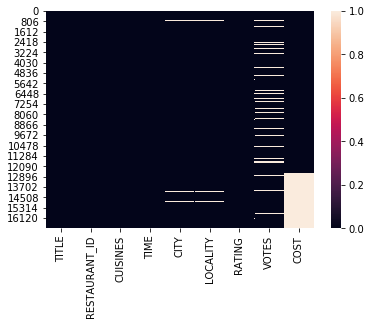

In [12]:
# lets' plot heatmapto see missing value

sns.heatmap(Fcost.isnull())

# in City,Locality,Rating and Votes columns have missing values.
# in Cost where we are seem missing values that is part of test dataset

In [13]:
# let's checking unique values in the dataset

print("No.Of Unique Values :\n",Fcost.nunique())

No.Of Unique Values :
 TITLE              123
RESTAURANT_ID    15574
CUISINES          5183
TIME              3295
CITY               450
LOCALITY          1636
RATING              32
VOTES             2075
COST                86
dtype: int64


In [14]:
# let's check how many value counts of object columns

for col in Fcost.columns:
    if Fcost[col].dtype=="object":
        print(Fcost[col].value_counts())
        print()


QUICK BITES                 5634
CASUAL DINING               4910
None                        1287
CAFÉ                         830
DESSERT PARLOR               508
                            ... 
CAFÉ,FOOD COURT                1
BEVERAGE SHOP,FOOD COURT       1
SWEET SHOP,BEVERAGE SHOP       1
BAR,MICROBREWERY               1
CLUB,FINE DINING               1
Name: TITLE, Length: 123, dtype: int64

North Indian                              716
North Indian, Chinese                     714
South Indian                              706
Fast Food                                 364
Chinese                                   226
                                         ... 
Biryani, South Indian, Chinese              1
Beverages, Finger Food, Drinks Only         1
Bakery, Desserts, Ice Cream, Cafe           1
Continental, Finger Food, North Indian      1
BBQ, Biryani, Continental                   1
Name: CUISINES, Length: 5183, dtype: int64

11am – 11pm (Mon-Sun)                          

In [15]:
# # univariate analysis of house price dataset
# describe function provide  statistics summary of continuous variable.

Fcost.describe()

# "RESTAURANT_ID" mostly different for all each restaurant and it's not affect the Food cost so later we will drop it.
# as we seen below in the Cost column mean is more than median and also difference in the 75% and max cost.

,RESTAURANT_ID,COST
count,16921.000000,12690.000000
mean,7767.211631,655.252246
std,4493.287626,627.003540
min,0.000000,20.000000
25%,3873.000000,300.000000
50%,7751.000000,500.000000
75%,11672.000000,800.000000
max,15573.000000,14000.000000


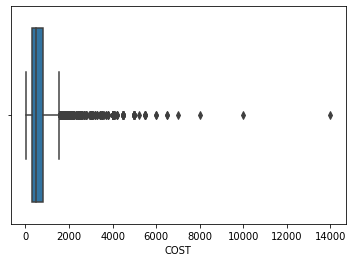

In [16]:
# let's check distribution of Cost columns

sns.boxplot(Fcost['COST'])

# it is show high number of variance in cost column

In [17]:
# let's check detail information of categorical and boolean varible
    
Fcost.describe(include=['object', 'bool'])

# Below data show all the categorical variables have lot of unique values except Rating.
# in the "TITLE" column  the top no. of Restaurant's title is QUICKBITES  with high frequency 5634.
# in the "CUISINES" column the top no.of Restaurant's CUISINES is North Indian with high frequency 716.
# in city column most frequent city is Chennai with 2855 frquency

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
count,16921,16921,16921,16774,16793,16917,15315
unique,123,5183,3295,450,1636,32,2075
top,QUICK BITES,North Indian,11am – 11pm (Mon-Sun),Chennai,Gachibowli,3.9,44 votes
freq,5634,716,1862,2855,216,1643,92


In [18]:
# let's check Quick Bites Cost because it is high on among Title name

Fcost.loc[Fcost['TITLE']=='QUICK BITES']['COST'].describe()

# as we see the Rasturant of QUICK BITES Food minimum cost rs.50 and the max. cost rs. 13000
# the Average cost of 300 the Rasturant of QUICK BITES Food.

count    4218.000000
mean      347.302750
std       145.663978
min        50.000000
25%       250.000000
50%       300.000000
75%       400.000000
max      1300.000000
Name: COST, dtype: float64

In [19]:
#lets chcek all the column's Rows where ever no voting.

Fcost[Fcost["VOTES"].isnull()]

# as we can observe from below data, where ever Rating is Missing and the Restaurant is new there are no Voting for Restaurant
# so we can fill Votes by 0 for New Restaurant and missing rating 

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
13,CASUAL DINING,4319,South Indian,11am – 11:30pm (Mon-Sun),Kochi,Edappally,-,NaN,400.0
62,QUICK BITES,7841,"North Indian, Beverages",11am – 11pm (Mon-Sun),Kochi,Kalamassery,NEW,NaN,200.0
69,None,11096,"Pizza, Fast Food",11am – 11pm (Mon-Sun),New Delhi,Kalkaji,NEW,NaN,200.0
85,QUICK BITES,12657,"North Indian, South Indian","Closed (Mon),7:30am – 10:30pm (Tue-Sun)",Bangalore,Vijay Nagar,-,NaN,300.0
111,CASUAL DINING,7095,"Gujarati, Rajasthani, North Indian","11:30am – 3:30pm, 7pm – 11pm (Mon-Sun)",Mumbai,Borivali West,NEW,NaN,800.0
...,...,...,...,...,...,...,...,...,...
16873,CAFÉ,7007,"Cafe, North Indian",11am – 11pm (Mon-Sun),Noida,Sector 63,NEW,NaN,NaN
16875,QUICK BITES,6387,Fast Food,12:30pm – 10:30pm (Mon-Sun),New Delhi,Shalimar Bagh,NEW,NaN,NaN
16888,QUICK BITES,13381,Continental,11am – 12midnight (Mon-Sun),Bangalore,Indiranagar,NEW,NaN,NaN
16913,CASUAL DINING,6887,"Sindhi, Street Food","11:30am – 4pm, 7pm – 11:30pm (Mon-Sun)",Mumbai,Lower Parel,NEW,NaN,NaN


In [20]:
#pd.crosstab(Fcost['CUISINES'],Fcost['COST'])


In [21]:
# let's check how many Duplicates value present in the dataset
Fcost.duplicated().sum()

26

In [22]:
# let's checking Restaurant title where ever rating is New

Fcost[Fcost['RATING']=='NEW']['TITLE'].value_counts()

# the highest rating is New for QUICK BITES Food Rasturant.

QUICK BITES                   453
None                          148
CASUAL DINING                 137
CAFÉ                           46
DESSERT PARLOR                 26
BEVERAGE SHOP                  25
CASUAL DINING,BAR              18
BAKERY                         14
BAR,CASUAL DINING               9
LOUNGE                          5
FOOD TRUCK                      5
CAFÉ,BAKERY                     4
BAR                             4
MICROBREWERY,CASUAL DINING      3
BEVERAGE SHOP,QUICK BITES       3
SWEET SHOP,QUICK BITES          3
FOOD COURT                      2
CLUB                            2
DHABA                           2
PUB,CASUAL DINING               2
BAKERY,QUICK BITES              2
CASUAL DINING,CLUB              1
SWEET SHOP                      1
CASUAL DINING,BAKERY            1
KIOSK                           1
CAFÉ,QUICK BITES                1
QUICK BITES,BEVERAGE SHOP       1
DESSERT PARLOR,QUICK BITES      1
MESS                            1
DESSERT PARLOR

In [23]:
# let's check Rating where city=Channai

Fcost[Fcost['CITY']=='Chennai']['COST'].describe()

# the average Food cost  is 400 in Chennai and max. food cost is 5500

count    2174.000000
mean      588.587856
std       560.829937
min        50.000000
25%       300.000000
50%       400.000000
75%       650.000000
max      5500.000000
Name: COST, dtype: float64

In [24]:
# let's check Average cost of North Indian Food

Fcost.loc[Fcost['CUISINES']=='North Indian']['COST'].describe()

# the mostly Average cost of North Indian Food is 350.
# the min cost is 100 and maximum cost is 6500.

count     526.000000
mean      541.539924
std       581.404953
min       100.000000
25%       250.000000
50%       350.000000
75%       600.000000
max      6500.000000
Name: COST, dtype: float64

# Observation :-

-  we can drop the RastauRant_ Id column because it is hold A unique ID for each restaurant,it is not affect the Food Cost.
   so we can drop this column.
   
-  we can also drop the "TIME" column because it is only show information related to open and colse time of "RASTAURANT" not      else.

- if we  look at the"VOTES" column it can be conveted to int by removing "votes" string wherever present in the vote             column.

- In the CITY ,LOCALITY ,RATING  and VOTES columns have massing values so we need to fill that. 

- We seem special character "-" in RATING column so we also count this as null values, so we can replace with "0" and also need   to change Data types in float.


## Attribute Information :-

- TITLE: The feature of the restaurant which can help identify what and for whom it is suitable for.

- RESTAURANT_ID: A unique ID for each restaurant.

- CUISINES: The variety of cuisines that the restaurant offers.

- TIME: The open hours of the restaurant.

- CITY: The city in which the restaurant is located.

- LOCALITY: The locality of the restaurant.

- RATING: The average rating of the restaurant by customers.

- VOTES: The overall votes received by the restaurant.

- COST: The average cost of a two-person meal.( this is our target varible)

In [25]:
# let's  we replace "-" and New Character with 0 and changing data type object to float

Fcost['RATING'] = Fcost['RATING'].str.replace('NEW', '0')
Fcost['RATING'] = Fcost['RATING'].str.replace('-', '0').astype(float)

In [26]:
# let convert Vote data type object to int by removing "votes" string presence from each rows in the vote  column.
Fcost['VOTES'] = Fcost['VOTES'].str.replace(' votes', '')

In [27]:
Fcost['VOTES'].fillna(0, inplace=True)

In [28]:
Fcost['VOTES'] =Fcost['VOTES'].astype(int)

In [29]:
# let's fill all null values using median and mode function

Fcost['CITY'].fillna('Missing', inplace=True)  
Fcost['LOCALITY'].fillna('Missing', inplace=True)  
Fcost['RATING'].fillna(0.0, inplace=True)  
Fcost['VOTES'].fillna(0, inplace=True)

In [30]:
# let's check again dataset
Fcost.head(10)

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49,1200.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30,1500.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221,800.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24,800.0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165,300.0
5,CASUAL DINING,5618,"North Indian, Chinese, Seafood, Biryani",12noon – 12:30AM (Mon-Sun),Mumbai,Vile Parle West,4.0,550,800.0
6,CAFÉ,4383,"Cafe, Chinese, Pizza, North Indian, Burger","12noon – 11:30pm (Mon, Tue, Thu, Fri, Sat, Sun...",Bangalore,Koramangala 6th Block,4.1,509,600.0
7,MICROBREWERY,1249,Bar Food,1pm – 1am (Mon-Sun),Gurgaon,Sector 29,4.3,1612,1600.0
8,QUICK BITES,7062,"South Indian, North Indian",7am – 10:30pm (Mon-Sun),Bangalore,Bannerghatta Road,3.9,101,300.0
9,QUICK BITES,10109,North Indian,"11am – 2pm, 4pm – 10:30pm (Mon-Sun)",Hyderabad,Dilsukhnagar,3.3,219,200.0


In [31]:
#Lets chcek the datatypes
Fcost.dtypes
#We have converted "RATING" and "VOTES" float 

TITLE             object
RESTAURANT_ID      int64
CUISINES          object
TIME              object
CITY              object
LOCALITY          object
RATING           float64
VOTES              int32
COST             float64
dtype: object

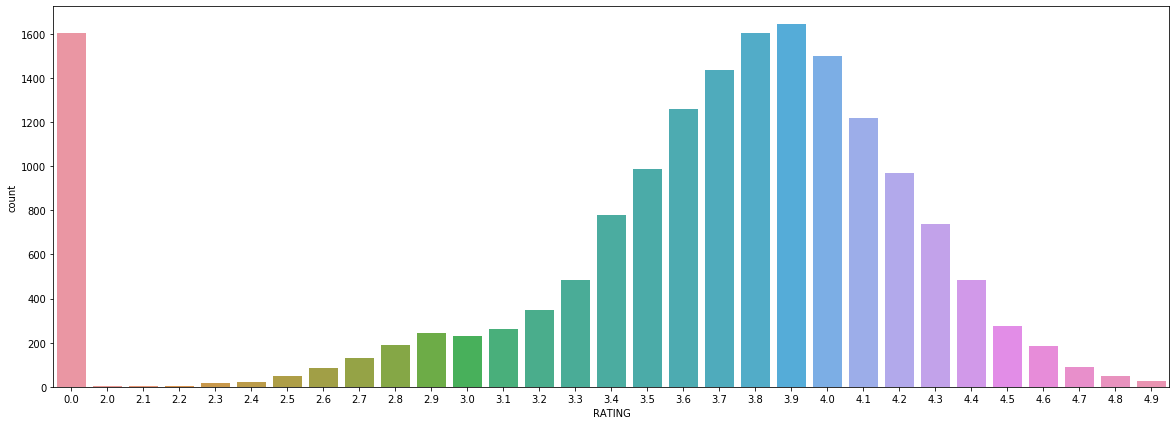

In [32]:
# let's do some graphical representation for more understanding

plt.figure(figsize=(20, 7))
sns.countplot(Fcost['RATING'])
plt.show()

# from the below graph we say that the highest rating given by customer is 3.9 followed by 3.8

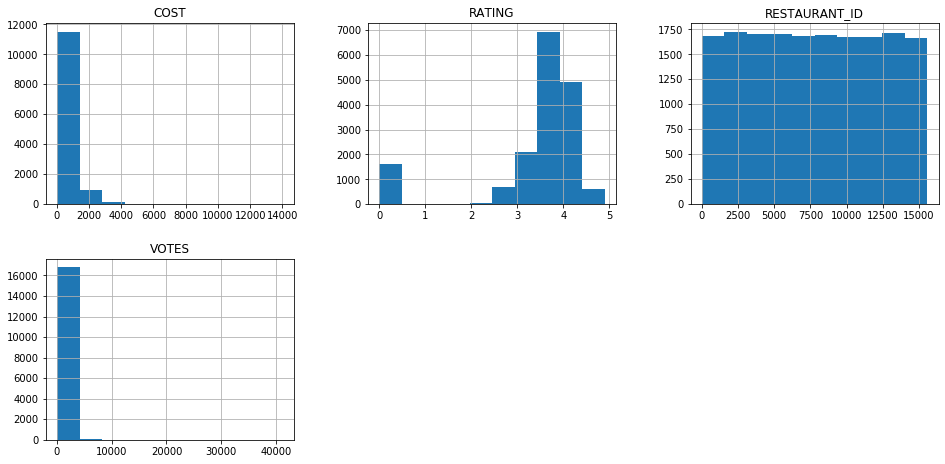

In [33]:
# let's do ploting using histogram to know about numerical variabkles in the dataset whether it is normal distribution or not.

Fcost.hist(figsize=(16,12),layout=(3,3))
plt.show()

In [34]:
#Lets drop "RESTAURANT_ID" and "TIME" from the dataset
Fcost.drop(columns=["RESTAURANT_ID","TIME"],inplace=True)

In [35]:
# let's check value count of title column
Fcost['TITLE'].value_counts()

QUICK BITES                 5634
CASUAL DINING               4910
None                        1287
CAFÉ                         830
DESSERT PARLOR               508
                            ... 
CAFÉ,FOOD COURT                1
BEVERAGE SHOP,FOOD COURT       1
SWEET SHOP,BEVERAGE SHOP       1
BAR,MICROBREWERY               1
CLUB,FINE DINING               1
Name: TITLE, Length: 123, dtype: int64

In [36]:
Fcost.head()

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian",Thane,Dombivali East,3.6,49,1200.0
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",Chennai,Ramapuram,4.2,30,1500.0
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi",Chennai,Saligramam,3.8,221,800.0
3,QUICK BITES,"Tibetan, Chinese",Mumbai,Bandra West,4.1,24,800.0
4,DESSERT PARLOR,Desserts,Mumbai,Lower Parel,3.8,165,300.0


In [37]:
# Let's Analysing Restaurant Titles to find maximum Title in one cell

titles = list(Fcost['TITLE'])

maxim = 1
for i in titles :
    if len(i.split(',')) > maxim:
         maxim = len(i.split(','))
            
print("Maximum Titles in a Cell : ", maxim)    
            

Maximum Titles in a Cell :  2


In [38]:
# from above data show maximum Titles in one cell is 2 and total unique titles are 25 
# Now we will divide the "TITLE" column into two column because maximum title in cell are 2

TITLE_1=list()
TITLE_2=list()
for i in titles:
    TITLE_1.append(i.split(',')[0].strip().upper())
    try :
        TITLE_2.append(i.split(',')[1].strip().upper())
    except :
        TITLE_2.append('NONE')

In [39]:
Fcost["TITLE_1"]=TITLE_1
Fcost["TITLE_2"]=TITLE_2

In [40]:
# let's check dataset after spliting TITLE columns 
Fcost.head(10)

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,COST,TITLE_1,TITLE_2
0,CASUAL DINING,"Malwani, Goan, North Indian",Thane,Dombivali East,3.6,49,1200.0,CASUAL DINING,NONE
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",Chennai,Ramapuram,4.2,30,1500.0,CASUAL DINING,BAR
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi",Chennai,Saligramam,3.8,221,800.0,CASUAL DINING,NONE
3,QUICK BITES,"Tibetan, Chinese",Mumbai,Bandra West,4.1,24,800.0,QUICK BITES,NONE
4,DESSERT PARLOR,Desserts,Mumbai,Lower Parel,3.8,165,300.0,DESSERT PARLOR,NONE
5,CASUAL DINING,"North Indian, Chinese, Seafood, Biryani",Mumbai,Vile Parle West,4.0,550,800.0,CASUAL DINING,NONE
6,CAFÉ,"Cafe, Chinese, Pizza, North Indian, Burger",Bangalore,Koramangala 6th Block,4.1,509,600.0,CAFÉ,NONE
7,MICROBREWERY,Bar Food,Gurgaon,Sector 29,4.3,1612,1600.0,MICROBREWERY,NONE
8,QUICK BITES,"South Indian, North Indian",Bangalore,Bannerghatta Road,3.9,101,300.0,QUICK BITES,NONE
9,QUICK BITES,North Indian,Hyderabad,Dilsukhnagar,3.3,219,200.0,QUICK BITES,NONE


In [41]:
#first we will find maximum number of cuisines resutarnt are serving

cuisines = list(Fcost['CUISINES'])

maxim = 1
for i in cuisines :
    if len(i.split(',')) > maxim:
         maxim = len(i.split(','))
            
print("Maximum CUISINES in a Cell : ", maxim)    
            

Maximum CUISINES in a Cell :  8


In [42]:
# we seen above the  Maximum number of cuisines in a cell is 8, so we will split CUISISES in to 8 columns.

Cuisines1=list()
Cuisines2=list()
Cuisines3=list()
Cuisines4=list()
Cuisines5=list()
Cuisines6=list()
Cuisines7=list()
Cuisines8=list()

for i in cuisines:
        try :
            Cuisines1.append(i.split(',')[0].strip().upper())
        except :
            Cuisines1.append('NONE')
        try :
            Cuisines2.append(i.split(',')[1].strip().upper())
        except :
            Cuisines2.append('NONE')
        try :
            Cuisines3.append(i.split(',')[2].strip().upper())
        except :
            Cuisines3.append('NONE')
        try :
            Cuisines4.append(i.split(',')[3].strip().upper())
        except :
            Cuisines4.append('NONE')
        try :
            Cuisines5.append(i.split(',')[4].strip().upper())
        except :
            Cuisines5.append('NONE')
        try :
            Cuisines6.append(i.split(',')[5].strip().upper())
        except :
            Cuisines6.append('NONE')
        try :
            Cuisines7.append(i.split(',')[6].strip().upper())
        except :
            Cuisines7.append('NONE')
        try :
            Cuisines8.append(i.split(',')[7].strip().upper())
        except :
            Cuisines8.append('NONE')
       

In [43]:
# let's add all columns in Fcost dataframe
Fcost["Cuisines1"]=Cuisines1
Fcost["Cuisines2"]=Cuisines2
Fcost["Cuisines3"]=Cuisines3
Fcost["Cuisines4"]=Cuisines4
Fcost["Cuisines5"]=Cuisines5
Fcost["Cuisines6"]=Cuisines6
Fcost["Cuisines7"]=Cuisines7
Fcost["Cuisines8"]=Cuisines8

In [44]:
Fcost.head()

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,COST,TITLE_1,TITLE_2,Cuisines1,Cuisines2,Cuisines3,Cuisines4,Cuisines5,Cuisines6,Cuisines7,Cuisines8
0,CASUAL DINING,"Malwani, Goan, North Indian",Thane,Dombivali East,3.6,49,1200.0,CASUAL DINING,NONE,MALWANI,GOAN,NORTH INDIAN,NONE,NONE,NONE,NONE,NONE
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",Chennai,Ramapuram,4.2,30,1500.0,CASUAL DINING,BAR,ASIAN,MODERN INDIAN,JAPANESE,NONE,NONE,NONE,NONE,NONE
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi",Chennai,Saligramam,3.8,221,800.0,CASUAL DINING,NONE,NORTH INDIAN,CHINESE,BIRYANI,HYDERABADI,NONE,NONE,NONE,NONE
3,QUICK BITES,"Tibetan, Chinese",Mumbai,Bandra West,4.1,24,800.0,QUICK BITES,NONE,TIBETAN,CHINESE,NONE,NONE,NONE,NONE,NONE,NONE
4,DESSERT PARLOR,Desserts,Mumbai,Lower Parel,3.8,165,300.0,DESSERT PARLOR,NONE,DESSERTS,NONE,NONE,NONE,NONE,NONE,NONE,NONE


In [45]:
# let's check again null values
Fcost.isnull().sum()

TITLE           0
CUISINES        0
CITY            0
LOCALITY        0
RATING          0
VOTES           0
COST         4231
TITLE_1         0
TITLE_2         0
Cuisines1       0
Cuisines2       0
Cuisines3       0
Cuisines4       0
Cuisines5       0
Cuisines6       0
Cuisines7       0
Cuisines8       0
dtype: int64

In [46]:
#We can drop "CUISINE" and "TITLE"columns
Fcost.drop(columns=["CUISINES","TITLE"],inplace=True)

In [47]:
# let's check correlation \
Fcost.corr()

,RATING,VOTES,COST
RATING,1.000000,0.261238,0.232358
VOTES,0.261238,1.000000,0.257231
COST,0.232358,0.257231,1.000000


In [48]:
label = LabelEncoder()
for col in Fcost:
     if Fcost[col].dtype == 'object':
        Fcost[col] = label.fit_transform(Fcost[col].astype('str'))

In [53]:
Fcost.dtypes

CITY           int32
LOCALITY       int32
RATING       float64
VOTES          int32
COST         float64
TITLE_1        int32
TITLE_2        int32
Cuisines1      int32
Cuisines2      int32
Cuisines3      int32
Cuisines4      int32
Cuisines5      int32
Cuisines6      int32
Cuisines7      int32
Cuisines8      int32
dtype: object

In [54]:
#Displaying the dataset
Fcost

,CITY,LOCALITY,RATING,VOTES,COST,TITLE_1,TITLE_2,Cuisines1,Cuisines2,Cuisines3,Cuisines4,Cuisines5,Cuisines6,Cuisines7,Cuisines8
0,401,328,3.6,49,1200.0,5,16,61,32,72,64,62,50,41,18
1,75,1215,4.2,30,1500.0,5,1,6,62,45,64,62,50,41,18
2,75,1273,3.8,221,800.0,5,16,74,23,14,34,62,50,41,18
3,278,161,4.1,24,800.0,23,16,102,23,70,64,62,50,41,18
4,278,709,3.8,165,300.0,9,16,30,67,70,64,62,50,41,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16916,317,1185,3.9,287,NaN,5,16,74,64,23,64,62,50,41,18
16917,42,461,4.3,469,NaN,20,16,15,69,83,73,83,50,41,18
16918,128,1371,3.7,53,NaN,23,16,29,69,70,64,62,50,41,18
16919,216,642,0.0,0,NaN,23,16,84,12,70,64,62,50,41,18


In [55]:
train=Fcost[Fcost["COST"].isnull()==False]
test=Fcost[Fcost["COST"].isnull()==True]

In [56]:
print(train.shape)
print(test.shape)

(12690, 15)
(4231, 15)


In [57]:
#Lets seprate the input and output varible from train dataset
x=train.drop("COST",axis=1)
y   =train["COST"]

In [58]:
print(x.shape)
print(y.shape)

(12690, 14)
(12690,)


In [59]:
#Lets bring every column to common scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [60]:
x

array([[ 2.08125502, -0.93447426,  0.14723745, ...,  0.09931697,
         0.08490643,  0.0725177 ],
       [-0.9443147 ,  1.00047269,  0.65581884, ...,  0.09931697,
         0.08490643,  0.0725177 ],
       [-0.9443147 ,  1.12699684,  0.31676458, ...,  0.09931697,
         0.08490643,  0.0725177 ],
       ...,
       [ 1.15316615,  1.72907729,  0.48629171, ...,  0.09931697,
         0.08490643,  0.0725177 ],
       [-0.9443147 , -0.07934551,  0.06247389, ...,  0.09931697,
         0.08490643,  0.0725177 ],
       [-0.15543916,  1.70944423, -0.02228968, ...,  0.09931697,
         0.08490643,  0.0725177 ]])

- the Restaurant Food Cost Prediction is a continuous in nature so these dataset can be viewed as a regression problem.

-  we also used different regression model to check and compare whether we get high r2 score or not, this exercise help us to      select best model.

- Here, I have trained various machine learning algorithms like

- Linear Regression
- Knn regressor
- Support Vector Regressor
- Gradient Boosting Regressor
- randomforestRegressor

In [61]:
#to find random stat which gives maximum r2_score

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# let's create fuinction to use different Regression model


def maxr2_score(rem,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.22)
        rem.fit(x_train,y_train)
        y_pred = rem.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [62]:
# let's apply linear regression model

from sklearn.linear_model import LinearRegression

lr=LinearRegression()
r_state=maxr2_score(lr,x,y)

max r2 score corresponding to  67  is  0.24087136573946533


In [63]:
#lets use random forest regressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rfr=RandomForestRegressor()
parameters = {"n_estimators":[10,100,500]}
cv = GridSearchCV(rfr, parameters, cv=5,scoring="r2")
cv.fit(x,y)
cv.best_params_

{'n_estimators': 500}

In [64]:
rfr=RandomForestRegressor(n_estimators=500)
r_state=maxr2_score(rfr,x,y)

max r2 score corresponding to  55  is  0.7541287525650885


In [66]:
from sklearn.model_selection import cross_val_score

print("Mean r2 score for RandomForest Regressor : ",cross_val_score(rfr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for RandomForest Regressor: ",cross_val_score(rfr,x,y,cv=5,scoring="r2").std())
print('\n')
print('cross val R2 score for GradientBoosting:',cross_val_score(rfr,x,y,cv=5,scoring="r2"))

Mean r2 score for RandomForest Regressor :  0.7040055225666929
standard deviation in r2 score for RandomForest Regressor:  0.04554978629143882


cross val R2 score for GradientBoosting: [0.63475757 0.74555189 0.67796393 0.71670124 0.75305109]


In [69]:
from sklearn.ensemble import GradientBoostingRegressor

parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500]}
gb=GradientBoostingRegressor()
gv = GridSearchCV(gb, parameters, cv=5,scoring="r2")
gv.fit(x,y)
gv.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [70]:
gb=GradientBoostingRegressor(learning_rate=0.1,n_estimators=500)
r_state=maxr2_score(gb,x,y)

max r2 score corresponding to  77  is  0.768599503715267


In [71]:
from sklearn.svm import SVR
svc=SVR()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
gv = GridSearchCV(svc, parameters, cv=5,scoring="r2")
gv.fit(x,y)
gv.best_params_

{'C': 10, 'kernel': 'rbf'}

In [74]:
svr=SVR(kernel="rbf",C=10)
r_state=maxr2_score(svr,x,y)

max r2 score corresponding to  57  is  0.2268543523295079


# I used multiple algorithms to  get highest r2 score corresponding to random state

- we seen till now GradientBoostingRegressor perform well is best model as comparision to other model which are apply in this     because we got max r2 score 76% at random state 77

- So we save model GradientBoostingRegressor for production.


In [75]:
# till the time  gradientboosting model has performed better as compare other
#we will be set random_state 77 to get max r2 score as we see above. 

x_train, x_test, y_train, y_test = train_test_split(x, y,random_state =77,test_size=0.22)

gb=GradientBoostingRegressor(learning_rate=0.1,n_estimators=500)
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))
print('\n')
print("Mean r2 score for GradientBoosting Regressor : ",cross_val_score(gb,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for GradientBoosting Regressor: ",cross_val_score(gb,x,y,cv=5,scoring="r2").std())
print('\n')
print('cross val R2 score for GradientBoosting:',cross_val_score(gb,x,y,cv=5,scoring="r2"))

RMSE is:  295.7640804131198
r2_score is:  0.7690342074777926


Mean r2 score for GradientBoosting Regressor :  0.7272900334003851
standard deviation in r2 score for GradientBoosting Regressor:  0.034392223005619046


cross val R2 score for GradientBoosting: [0.6581773  0.74847749 0.74287545 0.73831248 0.75120077]


In [76]:
from sklearn.externals import joblib
# save the model as a pickle in a file
joblib.dump(gb,'FoodCost_prediction.pkl')

['FoodCost_prediction.pkl']